# Tutorial Julia for Data Science

## 4 Dimensionality Reduction

Questo tutorial riguarda il trasformare dati riducendo il numero delle loro dimensioni mantenendo proprietà di interesse.   
Vedremo in particolare tre modo per fare cio: t-SNE, PCA e umap.  
Iniziamo preparando il nostro ambiente e caricando dei dati.

In [23]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

 Activating environment at `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\tutorial\Project.toml`


In [24]:
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [25]:
C = DataFrame(VegaDatasets.dataset("cars"))
@show names(C)
C[1:10,1:9]

names(C) = ["Name", "Miles_per_Gallon", "Cylinders", "Displacement", "Horsepower", "Weight_in_lbs", "Acceleration", "Year", "Origin"]


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64?,Int64,Float64,Int64?
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


Questo dataframe ha valori mancanti di cui non vogliamo occuparci, iniziamo rimuovendoli:

In [26]:
dropmissing!(C);

Le funzioni che useremo operano su matrici quindi prendiamoci anche una conversione del dataframe in una matrice:

In [27]:
M = Matrix(C[:,2:7]);

In quest matrice abbiamo solo messo valori per le variabili: "Miles_per_Gallon" "Cylinders" "Displacement" "Horsepower" "Weight_in_lbs" "Acceleration".  
La variabile Origin è una variabile categoriale rappresentata con una stringa, convertiamola in un numero di indice:

In [28]:
car_origin = C[:,:Origin]# prendiamo vettori origini
carmap = labelmap(car_origin) #from MLBase, mappa i valori stringa in numeri unicamente rappresentanti al valore
uniqueids = labelencode(carmap,car_origin); # prende stringa valori e li cambia con la mappatura in numero

### PCA
Come operazione preliminare normalizziamo e standardizziamo i dati con questa trasformazione:  
$$  x_{ij} \to \frac{x_{ij}-\mu_j}{\sigma_j}  $$  
dove $ x_{ij} $ è il valore della variabile $ j $ per il campione $i$, $\mu_j$ è la media campionaria della variabile $j$ e $\sigma_j$ la sua deviazione standard.

In [29]:
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)

392×6 Array{Float64,2}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   

La PCA interpreta una colonna come un osservazione, ciò significa che dobbiamo dargli la trasposta della nostra matrice

In [30]:
p = fit(PCA,data',maxoutdim=2) 

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333573)

Maxoutputdim indica il massimo numero di dimenzioni del risultato della riduzione, con macoutputdim=2 otterremo dati al massimo in 2 dimensioni.  

Otteniamo la matrice id proiezione con il comando projection:

In [31]:
P = projection(p)

6×2 Array{Float64,2}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

Moltiplicando dati a questa matrice otterremo i dati a dimenzioin ridotte, vediamo prima solo su una colonna:

In [32]:
P'*(data[1,:]-mean(p))

2-element Array{Float64,1}:
 -2.3230016965226916
 -0.5713519642644685

Poi su tutta la matrice dati:

In [33]:
Yte = MultivariateStats.transform(p, data') 

2×392 Array{Float64,2}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

E'possibila riavvicinarsi alla matrice originaria:

In [34]:
Xr = reconstruct(p, Yte)

6×392 Array{Float64,2}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

Questa funzione inversa non è però perfetta:

In [35]:
norm(Xr-data') 

13.743841055569009

Vediamo ora qualche plot di questi dati ridimensionati:

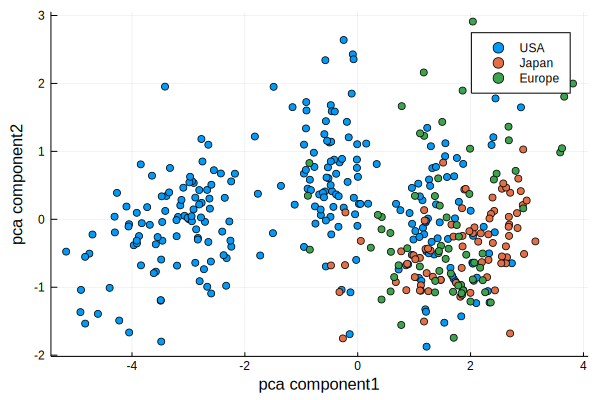

In [36]:
#facciamo un plot delle macchine usando dati ridimensionati
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe")
#ogni plot.scatter plotta solo campioni di una determinata car_origin
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")

A prima vista si direbbe che i dati presentino 3 raggruppamenti, due contenenti prevalentemente macchine americane, l altro un misto.  
Vediamo adesso una riduzione a 3 dimensioni e un grafico 3d con makie:

In [37]:
p = fit(PCA,data',maxoutdim=3)# ridimensina in massimo 3 invece che 2 come prima
Yte = MultivariateStats.transform(p, data')
scene = Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids)

Una volta eseguito il codice, potremo lanciare il display interattivo in un altra finestra, nella quale si potrà vedere il grafico 3d da tutte le angolazioni:

In [38]:
display(scene)

GLMakie.Screen(...)

Anche riducendo a 3 dimensioni possiamo vedere il pattern visto prima.

### t-SNE
Ci sono molteplici modi per far andare t-SNE da Julia, proviamo qui facendolo partire dal pacchetto scikit learn per python, installandolo prima con Conda:

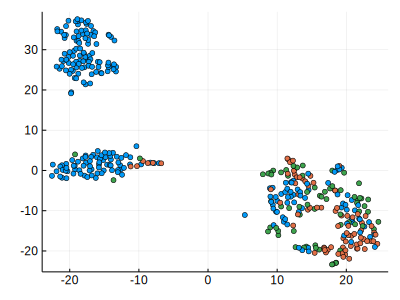

In [39]:
@sk_import manifold : TSNE# installa scikit via conda
tfn = TSNE(n_components=2) #,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(400,300),markersize=3)
#NB: stavolta nbiente trasposta

Sono sempre visibili 3 raggruppamenti.

### umap
Ultimo modo per ridurre le dimensionalitàà dei dati che vedremo è umap.  
Per usarlo ci serve esprimere i dati come matrice di distanza tra essi, ovvero matrice quadrata
$$ L = \{ l_{ij} \} \mbox{    dove }l_{ij}\mbox{ è la distanza tra i campioni }i\mbox{ e }j$$
Il fattore su cui definiamo questa distanza cambioa a seconda di quale caratteriustica dei dati vogliamo approfondire.  
Per or proviamo prima con la correlazione:

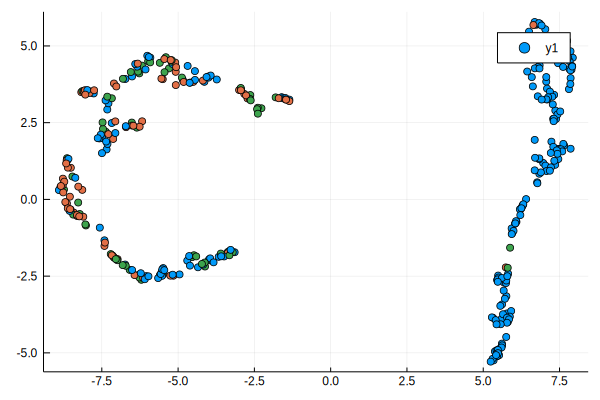

In [41]:
L = cor(data ,data,dims=2) #distanza definita come correlazione
embedding = umap(L, 2)

Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

Si vedono ancora 3 gruppi di osservazioni.  
Vediamo ora definedno la distanza con la distanza euclidiana:

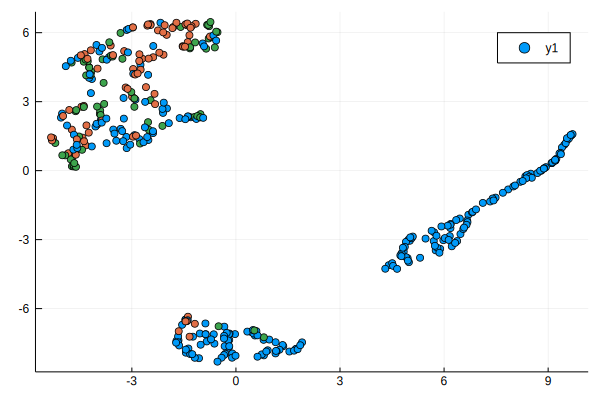

In [42]:
L = pairwise(Euclidean(), data, data,dims=1) 
embedding = umap(L, 2)
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

Anche in questo modo i dati appaiono raggruppati in 3 parti.  

E'verosimile concludere quindi che le macchine giapponesi ed europee tendono ad avere caratteristiche simili, mentre le macchine americane si dividono in due loro gruppi separati dal resto.